In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from PIL import Image
import requests
from urllib.request import urlopen, Request
from PyPDF2 import PdfWriter, PdfReader
from io import BytesIO, StringIO
import io
import os
from pdf2image import convert_from_path
#from IPython import display
from IPython.display import Image,HTML,display
import psycopg2
import os.path
from ipyplot import plot_images
from datetime import date
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
w = date.today().isocalendar()[1]

In [3]:
conn = psycopg2.connect("host='vps40890.publiccloud.com.br' port='5432' dbname='carbon' user='juliana' password='juliana@mudar'")
cur = conn.cursor()

In [4]:
# url = "https://www.nass.usda.gov/Charts_and_Maps/Crop_Progress_&_Condition/2023/US_2023.pdf"
# response = requests.get(url)
# name = 'us_2023.pdf'
# with open(name, 'wb') as f:
#     f.write(response.content)

# i = convert_from_path(name, \
#                        poppler_path = r'C:\Users\gabri\Downloads\Release-23.01.0-0\poppler-23.01.0\Library\bin')  
# display(i[8])

In [5]:
# usa_estados = ["IA", "IL", "IN", "OH", "MN", "SD", "KS", "MO", "WI", "MI"]
# url_usa_estados = []
# #url_usa_estados_corn_png = []
# #url_usa_estados_soy_png = []

# soja_pg = [3,2,2,3,3,4,4,4,3,3]

# for estado in usa_estados:
#     estado = "https://www.nass.usda.gov/Charts_and_Maps/Crop_Progress_&_Condition/2023/" + \
#                                 estado + "_2023.pdf"
#     url_usa_estados.append(estado)

# for i in range(len(soja_pg)):
#     name = url_usa_estados[i].split('/')[-1]
    
#     if not os.path.isfile(name):
#         response = requests.get(url)
#         with open(name, 'wb') as f:
#             f.write(response.content)

#     im = convert_from_path(name, \
#                            poppler_path = r'C:\Users\gabri\Downloads\Release-23.01.0-0\poppler-23.01.0\Library\bin')
    
#     display(im[0])
#     display(im[soja_pg[i]])
    
# #     url_usa_estados_corn_png.append(im[0])
# #     url_usa_estados_soy_png.append(im[soja_pg[i]])
    
# # for i in range(len(url_usa_estados_corn_png)):
# #     display(url_usa_estados_corn_png[i])
# #     display(url_usa_estados_soy_png[i])

In [6]:
url_lanina = "https://iri.columbia.edu/wp-content/uploads/2023/01/figure3.png"
display(Image(url = url_lanina))

url_ppt = 'https://iri.columbia.edu/climate/forecast/net_asmt_nmme/2023/jan2023/images/FMA23_World_pcp.gif'
display(Image(url = url_ppt))

url_temp = "https://iri.columbia.edu/climate/forecast/net_asmt_nmme/2023/jan2023/images/FMA23_World_tmp.gif"
display(Image(url = url_temp))

## Europa

### Soil Moisture

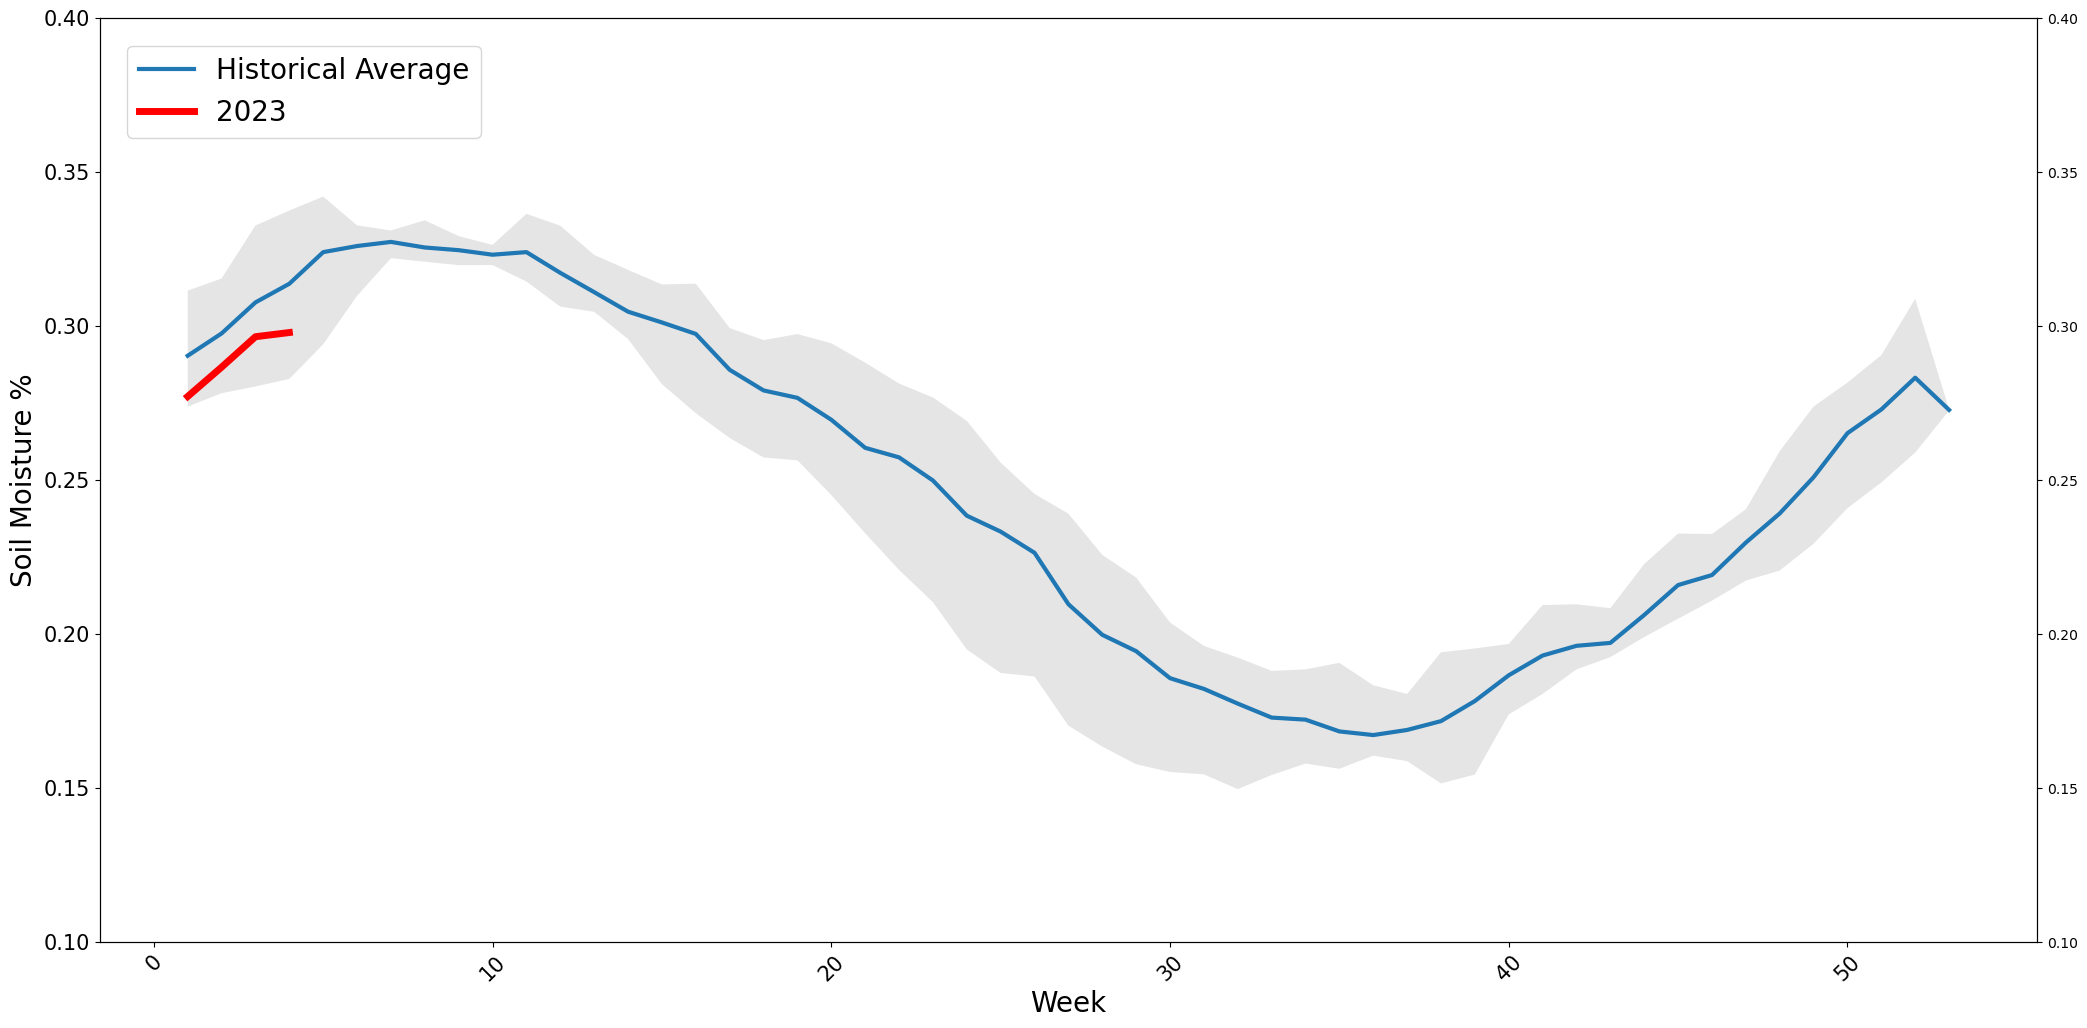

In [7]:
# Import data

query = 'SELECT * FROM "research"."europe_smos"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
smosue = DataFrame(cur.fetchall(), columns = colnames)

smosue_sel = smosue.loc[(smosue['umidade'] > -1)].groupby(['date_year', 'week'])['umidade'].mean()

maximum = smosue_sel.groupby('week').max()
minimum = smosue_sel.groupby('week').min()
media = smosue_sel.groupby('week').mean()

sl = [maximum, minimum, media]
tygraph_data = pd.concat(sl,  axis=1,)
tygraph_data.columns = ['max', 'min', 'media']

max_2023 = smosue_sel.loc[(smosue_sel.index.get_level_values(0) == 2023) & (smosue_sel.index.get_level_values(1) < 50)].groupby('week').max()
min_2023 = smosue_sel.loc[(smosue_sel.index.get_level_values(0) == 2023) & (smosue_sel.index.get_level_values(1) < 50)].groupby('week').min()
media_2023 = smosue_sel.loc[(smosue_sel.index.get_level_values(0) == 2023) & (smosue_sel.index.get_level_values(1) < 50)].groupby('week').mean()

sl_2023 = [max_2023, min_2023, media_2023]
dados_2023 = pd.concat(sl_2023,  axis=1,)
dados_2023.columns = ['max', 'min', 'media']

#plt.figure(figsize = (40,17))
fig, ax1 = plt.subplots(figsize = (25,12))
#ax1 = plt.figure(figsize = (30,17))
ln1 = ax1.plot(tygraph_data.index, tygraph_data.media, linewidth=3, label = 'Historical Average')
plt.fill_between(x=tygraph_data.index,y1='min',y2='max',data=tygraph_data,facecolor='GRAY', alpha=0.2)
# calling the function to add value labels
#self.addlabels(list_x, list_y_f)
plt.ylabel('Soil Moisture %', color = 'black', fontsize = 20)  
plt.xlabel('Week', color = 'black', fontsize = 20)
ax1.tick_params(axis="x", labelsize=15, rotation = 45)
ax1.tick_params(axis="y", labelsize=15)
#plt.legend(labels=["Historical Average"], loc='upper left', frameon=True, fontsize = 15)


ax2=ax1.twinx()
ln2 = ax2.plot(dados_2023.index, dados_2023.media, color = 'red',linewidth=5, label = '2023')
ax1.set_ylim(0.1,0.4)
ax2.set_ylim(0.1,0.4)
# plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
# plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
# plt.xlabel('Data', color = 'black', fontsize = 20)
# ax2.tick_params(axis="x", labelsize=15, rotation = 45)
# ax2.tick_params(axis="y", labelsize=15)

lns = ln1+ln2
labs = [l.get_label() for l in lns]

ax1.legend(lns,  labs, loc='upper left', fontsize = 20, borderaxespad= 1)
#plt.legend(labels=['2023'], loc='upper left', frameon=True, fontsize = 15,  borderaxespad= 3)
#plt.savefig("temp_ppt.png", bbox_inches='tight')
#plt.legend(bbox_to_anchor=(0.1, -0.15), loc='upper left', borderaxespad=0, ncol=3, frameon=False, fontsize = 20)

plt.show()

## Brazil

### Soil Moisture

C:\Users\gabri\AppData\Local\Temp\ipykernel_48544\776672082.py:39: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb = plt.colorbar(plot)


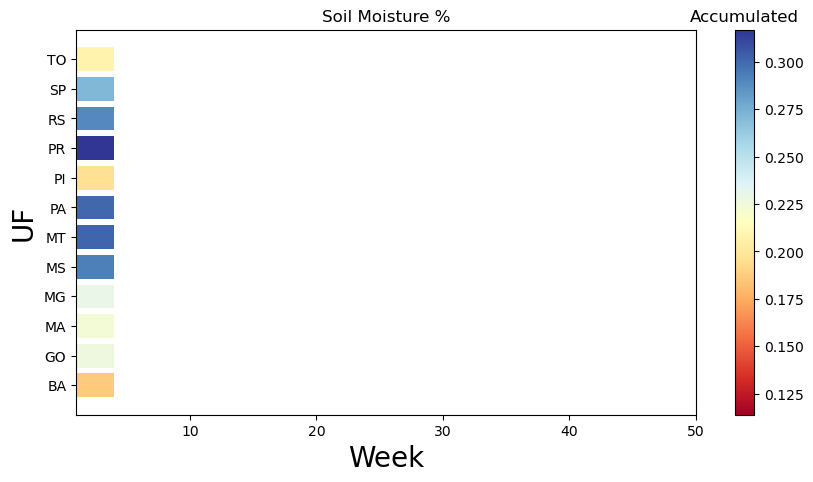

In [8]:
query = 'SELECT * FROM "research"."brasil_smos"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
smosbr = DataFrame(cur.fetchall(), columns = colnames)

uf_list = ['MT','GO','PR','MS' ,'RS','MG','BA','TO'\
           ,'SP','MA','PI','PA'] 
smosbr_sel = smosbr.loc[(smosbr['umidade'] > -1) & (smosbr['sigla_uf'].isin(uf_list))].groupby(['date_year', 'week', 'sigla_uf'])['umidade'].mean()

maximum = smosbr_sel.groupby(['week', 'sigla_uf']).max()
minimum = smosbr_sel.groupby(['week', 'sigla_uf']).min()
media = smosbr_sel.groupby(['week', 'sigla_uf']).mean()

sl = [maximum, minimum, media]
tygraph_data = pd.concat(sl,  axis=1,)
tygraph_data.columns = ['max', 'min', 'media']

max_2023 = smosbr_sel.loc[(smosbr_sel.index.get_level_values(0) == 2023) & (smosbr_sel.index.get_level_values(2).isin(uf_list))\
                          & (smosbr_sel.index.get_level_values(1) < 50)].groupby(['week', 'sigla_uf']).max()
min_2023 = smosbr_sel.loc[(smosbr_sel.index.get_level_values(0) == 2023) & (smosbr_sel.index.get_level_values(2).isin(uf_list))\
                          & (smosbr_sel.index.get_level_values(1) < 50)].groupby(['week', 'sigla_uf']).min()
media_2023 = smosbr_sel.loc[(smosbr_sel.index.get_level_values(0) == 2023) & (smosbr_sel.index.get_level_values(2).isin(uf_list))\
                            & (smosbr_sel.index.get_level_values(1) < 50)].groupby(['week', 'sigla_uf']).mean()

sl_2023 = [max_2023, min_2023, media_2023]
dados_2023 = pd.concat(sl_2023,  axis=1,)
dados_2023.columns = ['max', 'min', 'media']

dataset = smosbr_sel.loc[(smosbr_sel.index.get_level_values(0) == 2023) & (smosbr_sel.index.get_level_values(1) < 50)\
                         & (smosbr_sel.index.get_level_values(1) > 1)]

fig, ax = plt.subplots(figsize = (10,5))
colors = cm.RdYlBu(dataset.values / float(max(dataset.values)))
# #ax1 = plt.figure(figsize = (30,17))
plot = plt.scatter(dataset.index.get_level_values(1), dataset.index.get_level_values(2),\
                   c = dataset.values, cmap = 'RdYlBu')
plt.clf()

cb = plt.colorbar(plot)
cb.ax.set_title('Accumulated')
plt.barh(dataset.index.get_level_values(2), dataset.index.get_level_values(1), color = colors)
plt.xlim([1,50])
plt.ylabel('UF', color = 'black', fontsize = 20)  
plt.xlabel('Week', color = 'black', fontsize = 20)
plt.title("Soil Moisture %")
plt.show()

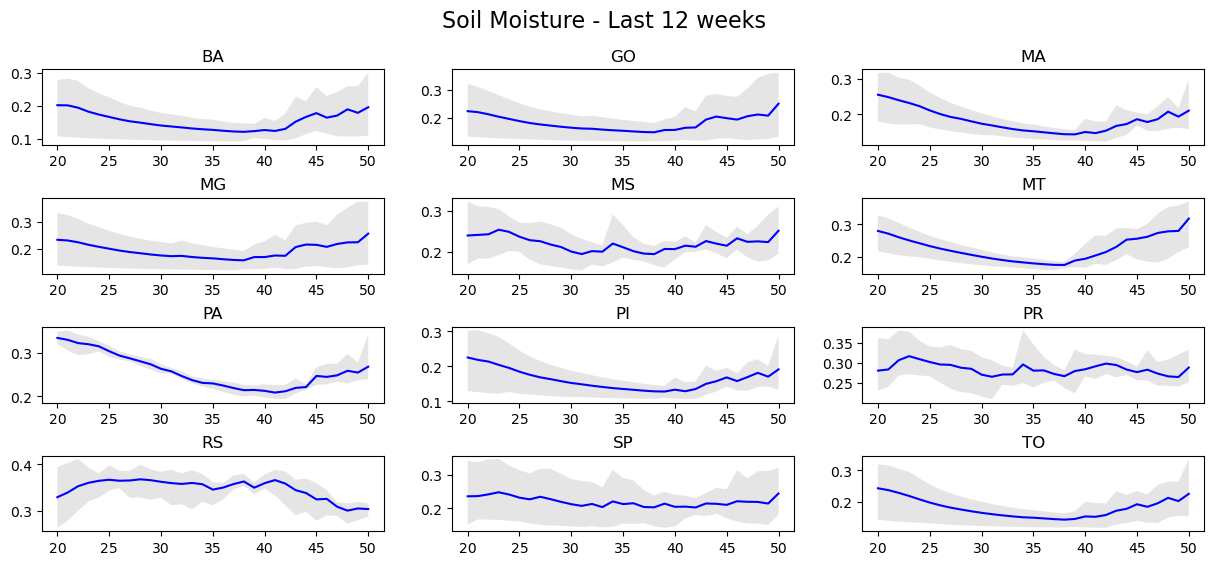

In [9]:
uf_smosbr_sel = smosbr_sel.loc[(smosbr_sel.index.get_level_values(1) >= 20) & (smosbr_sel.index.get_level_values(1) <= 50)]\
.groupby(['week', 'sigla_uf']).agg(['mean', 'min', 'max'])

ufs = list(uf_smosbr_sel.index.get_level_values(1).unique())

fig, axs = plt.subplots(4,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .7, wspace=.2)
fig.suptitle('Soil Moisture - Last 12 weeks', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = uf_smosbr_sel.loc[(uf_smosbr_sel.index.get_level_values(1) == ufs[i])]
    x = group1.index.get_level_values(0)
    y = group1['mean']
    #plt.figure(figsize=(5,4))
    axs[i].plot(x, y, c ="blue")
    axs[i].fill_between(x=group1.index.get_level_values(0),y1=group1['min']\
                     ,y2=group1['max'],data=group1,facecolor='GRAY', alpha=0.2)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()

### Precipitation

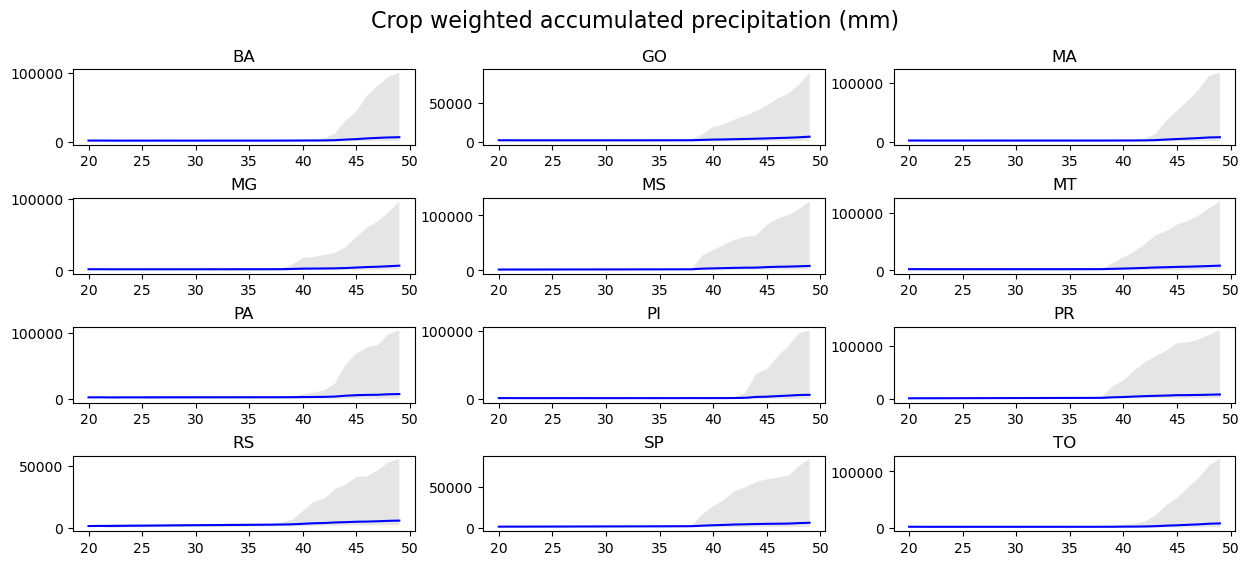

In [10]:
query = 'SELECT * FROM "research"."brasil_gpm"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
gpmbr = DataFrame(cur.fetchall(), columns = colnames)

uf_list = ['MT','GO','PR','MS' ,'RS','MG','BA','TO'\
           ,'SP','MA','PI','PA']

gpmbr_sel = gpmbr.loc[(gpmbr['precipitationcal'] > -1) \
                       & (gpmbr['sigla_uf'].isin(uf_list))].groupby(['date_year', 'week', 'sigla_uf'],as_index=False)\
['precipitationcal'].sum()



#gpmbr_sel
gpmbr_sel['cumsum'] = gpmbr_sel.groupby(['date_year','sigla_uf'])['precipitationcal'].transform(pd.Series.cumsum)

ttd2 = gpmbr_sel.loc[(gpmbr_sel['precipitationcal'] > 0) & (gpmbr_sel['week'] < 50) & \
                   (gpmbr_sel['week'] >= 20)]

ttd2_mean = ttd2.groupby(['week', 'sigla_uf']).agg({'cumsum': ['mean', 'min', 'max']})

ufs = list(ttd2_mean.index.get_level_values(1).unique())

fig, axs = plt.subplots(4,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .7, wspace=.2)
fig.suptitle('Crop weighted accumulated precipitation (mm)', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = ttd2_mean.loc[(ttd2_mean.index.get_level_values(1) == ufs[i])]
    x = group1.index.get_level_values(0)
    y = group1['cumsum']['mean']
    #plt.figure(figsize=(5,4))
    axs[i].plot(x, y, c ="blue")
    axs[i].fill_between(x=group1.index.get_level_values(0),y1=group1['cumsum']['min']\
                     ,y2=group1['cumsum']['max'],data=group1,facecolor='GRAY', alpha=0.2)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()

### Vegetation Index

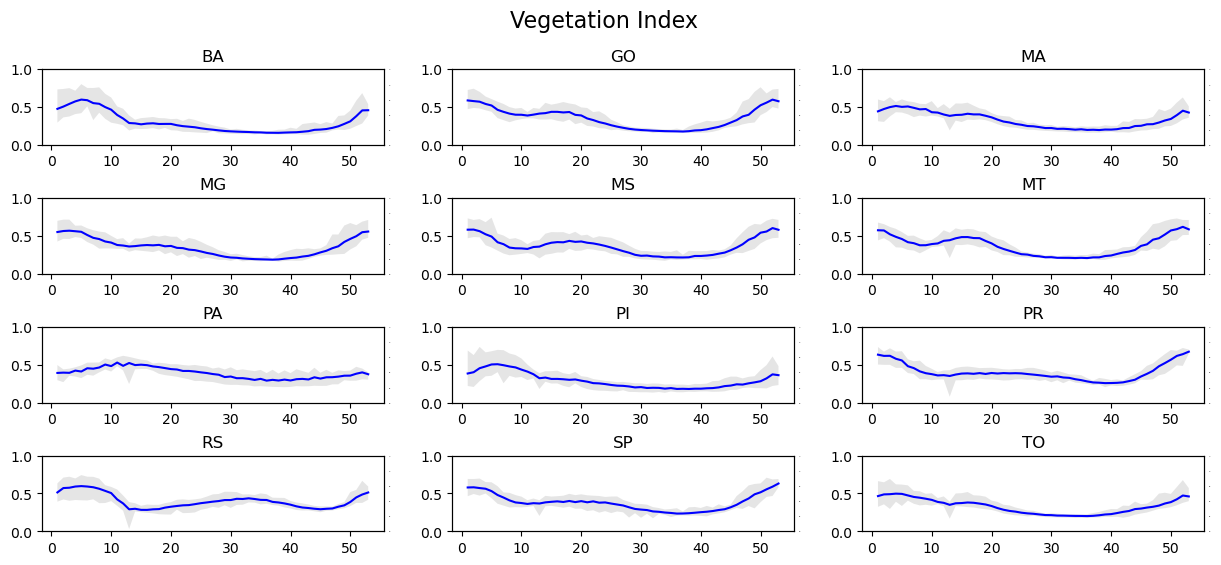

In [11]:
query = 'SELECT * FROM "research"."brasil_modis"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
mdodisbr = DataFrame(cur.fetchall(), columns = colnames)

uf_list = ['MT','GO','PR','MS' ,'RS','MG','BA','TO'\
           ,'SP','MA','PI','PA']


modisbr_sel = mdodisbr.loc[(mdodisbr['evi'] > -1) \
                       & (mdodisbr['sigla_uf'].isin(uf_list))].groupby(['date_year', 'week', 'sigla_uf'],as_index=False)\
['evi'].mean()

modisbr_sel_hist = modisbr_sel.groupby(['week', 'sigla_uf'],as_index=False).agg({'evi': ['mean', 'min', 'max']})

modisbr_sel_2023 =modisbr_sel.loc[(modisbr_sel['date_year'] == 2023)].\
groupby(['week', 'sigla_uf'],as_index=False).agg({'evi': ['mean', 'min', 'max']})

ufs = list(modisbr_sel['sigla_uf'].unique())

fig, axs = plt.subplots(4,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .7, wspace=.2)
fig.suptitle('Vegetation Index', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = modisbr_sel_hist.loc[(modisbr_sel_hist['sigla_uf'] == ufs[i])]
    x = group1['week']
    y = group1['evi']['mean']
    #plt.figure(figsize=(5,4))
    ln1 = axs[i].plot(x, y, c ="blue", label = 'Historical Data')
    axs[i].fill_between(x=group1['week'],y1=group1['evi']['min']\
                     ,y2=group1['evi']['max'],data=group1,facecolor='GRAY', alpha=0.2)
    axs[i].set_ylim(0,1)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()
    ax2=axs[i].twinx()
    group2 = modisbr_sel_2023.loc[(modisbr_sel_2023['sigla_uf'] == ufs[i])]
    x2 = group2['week']
    y2 = group2['evi']['mean']
    #plt.figure(figsize=(5,4))
    ln2 = axs[i].plot(x2, y2, c ="red", label = '2023')
    axs[i].set_ylim(0,1)
    ax2.set_ylim(0,1)
    # plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
    # plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
    # plt.xlabel('Data', color = 'black', fontsize = 20)
    # ax2.tick_params(axis="x", labelsize=15, rotation = 45)
    ax2.tick_params(axis="y", labelsize=0, length=0)

    lns = ln1+ln2
    labs = [l.get_label() for l in lns]

    #axs[i].legend(lns,  labs, loc='upper left', fontsize = 20, borderaxespad= 1)
    #plt.legend(labels=['2023'], loc='upper left', frameon=True, fontsize = 15,  borderaxespad= 3)
    #plt.savefig("temp_ppt.png", bbox_inches='tight')
    #plt.legend(bbox_to_anchor=(0.1, -0.15), loc='upper left', borderaxespad=0, ncol=3, frameon=False, fontsize = 20)

    #plt.show()

## Argentina 

### Soil Moisture

In [ ]:
query = 'SELECT * FROM "research"."argentina_smos"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
smosar = DataFrame(cur.fetchall(), columns = colnames)

smosar_sel = smosar.loc[(smosar['umidade'] > -1)].groupby(['date_year', 'week', 'departamen'], as_index=False)['umidade'].mean()
smosar_sel_hist = smosar_sel.groupby(['week', 'departamen'],as_index=False).agg({'umidade': ['mean', 'min', 'max']})
smosar_sel_2023 = smosar_sel.loc[(smosar_sel['date_year'] == 2023) & (smosar_sel['week'] <= w)].groupby(['week', 'departamen'],as_index=False).agg({'umidade': ['mean', 'min', 'max']})

ufs = list(smosar_sel_hist['departamen'].unique())

fig, axs = plt.subplots(4,4, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .7, wspace=.2)
fig.suptitle('Soil Moisture', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = smosar_sel_hist.loc[(smosar_sel_hist['departamen'] == ufs[i])]
    x = group1['week']
    y = group1['umidade']['mean']
    #plt.figure(figsize=(5,4))
    axs[i].plot(x, y, c ="blue")
    axs[i].fill_between(x=group1['week'],y1=group1['umidade']['min']\
                     ,y2=group1['umidade']['max'],data=group1,facecolor='GRAY', alpha=0.2)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()
    ax2=axs[i].twinx()
    group2 = smosar_sel_2023.loc[(smosar_sel_2023['departamen'] == ufs[i])]
    x2 = group2['week']
    y2 = group2['umidade']['mean']
    #plt.figure(figsize=(5,4))
    ln2 = axs[i].plot(x2, y2, c ="red", label = '2023')
    axs[i].set_ylim(0,0.5)
    ax2.set_ylim(0,0.5)
    # plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
    # plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
    # plt.xlabel('Data', color = 'black', fontsize = 20)
    # ax2.tick_params(axis="x", labelsize=15, rotation = 45)
    ax2.tick_params(axis="y", labelsize=0, length=0)

#     lns = ln1+ln2
#     labs = [l.get_label() for l in lns]


In [ ]:
url='https://www.bolsadecereales.com/admin/phpexcel/Examples/reporte_bd.php?cultivo=1&campania=2022/23,2021/22,2020/21,2019/20,2018/19,2017/18&zona=&t=ECC'
argmaize = pd.read_excel(url)

argmaize.columns = ["cultivo", "zona","campana", "semana","siembra", "cc_mala", "cc_regular", "cc_normal", "cc_buena",\
                    "cc_excelente", "ch_sequia", "ch_regular", "ch_adecuada", "ch_optima", "ch_excesso", "expansion_foliar",\
                    "panojamiento", "floracion_femenina", "grano_pastoso", "madurez_fisiologica", "cosecha"]

sel_argmaize = argmaize.loc[(argmaize['campana'] != "2016/17") & (argmaize['cultivo'] == 'Maiz') \
                            & (argmaize['zona'] == 'TOTAL')]

sel_argmaize['cc_b_ex'] = sel_argmaize['cc_excelente'] + sel_argmaize['cc_buena']

sel_argmaize = sel_argmaize.drop(sel_argmaize[(sel_argmaize['campana'] == '2022/23') & (sel_argmaize['semana'] > w)].index)

#sizes = [2,2,5]
plt.figure(figsize = (10,7))
#plt.subplot(321)
with sns.axes_style("whitegrid"):
    sns.lineplot(data = sel_argmaize ,
                 x = 'semana',
                 y = 'cc_b_ex', 
                 hue = 'campana',
                 size = 'campana')#,
                 #sizes= sizes)
    
    plt.ylim((0,110))
    plt.title("Corn Crop conditions G+E", fontsize = 20)
    plt.ylabel('', color = 'black', fontsize = 20)  
    plt.xlabel('weeks', color = 'black', fontsize = 20)
    plt.yticks(fontsize=17, color = 'black')
    plt.xticks(fontsize=17, color = 'black', rotation=90)
#    plt.legend(title="Season",borderaxespad=2, frameon=True, fontsize = 15, loc='upper left', bbox_to_anchor=(0.95, 0.05))
    plt.legend(title="Season",borderaxespad=0.5, frameon=True, fontsize = 15, loc='upper left')

    
    plt.show()
    #plt.savefig('C:\\Users\\jabre\\Documents\\merx\\reseacrh\\IMAGENS\\CONAB\\todos.png', bbox_inches='tight')
    
#sizes = [2,2,5]
plt.figure(figsize = (10,7))
#plt.subplot(321)
sel_argmaize_cosecha = sel_argmaize.drop(sel_argmaize[(sel_argmaize['cosecha'] == 0)].index)

with sns.axes_style("whitegrid"):
    sns.lineplot(data = sel_argmaize_cosecha,
                 x = 'semana',
                 y = 'cosecha', 
                 hue = 'campana',
                 size = 'campana')#,
                 #sizes= sizes)
    
    plt.ylim((0,110))
    plt.title("Corn Crop Harvest", fontsize = 20)
    plt.ylabel('', color = 'black', fontsize = 20)  
    plt.xlabel('weeks', color = 'black', fontsize = 20)
    plt.yticks(fontsize=17, color = 'black')
    plt.xticks(fontsize=17, color = 'black', rotation=90)
#    plt.legend(title="Season",borderaxespad=2, frameon=True, fontsize = 15, loc='upper left', bbox_to_anchor=(0.95, 0.05))
    plt.legend(title="Season",borderaxespad=0.5, frameon=True, fontsize = 15, loc='upper left')

    
    plt.show()
    #plt.savefig('C:\\Users\\jabre\\Documents\\merx\\reseacrh\\IMAGENS\\CONAB\\todos.png', bbox_inches='tight')    

In [ ]:
url='https://bolsadecereales.com/admin/phpexcel/Examples/reporte_bd.php?cultivo=2&campania=&zona=&t=ECC'
argsoja = pd.read_excel(url)

argsoja.columns = ["cultivo", "zona","campana", "semana","siembra", "cc_mala", "cc_regular", "cc_normal", "cc_buena",\
                    "cc_excelente", "ch_sequia", "ch_regular", "ch_adecuada", "ch_optima", "ch_excesso", "expansion_foliar",\
                    "panojamiento", "floracion_femenina", "grano_pastoso", "madurez_fisiologica", "cosecha"]

sel_argsoja = argsoja.loc[(argsoja['campana'] != "2016/17") & (argsoja['cultivo'] == 'Soja') \
                            & (argsoja['zona'] == 'TOTAL')]

sel_argsoja = sel_argsoja.drop(sel_argsoja[(sel_argsoja['campana'] == '2022/23') & (sel_argsoja['semana'] > w)].index)

sel_argsoja['cc_b_ex'] = sel_argsoja['cc_excelente'] + sel_argsoja['cc_buena']

#sizes = [2,2,5]
plt.figure(figsize = (10,7))
#plt.subplot(321)
with sns.axes_style("whitegrid"):
    sns.lineplot(data = sel_argsoja ,
                 x = 'semana',
                 y = 'cc_b_ex', 
                 hue = 'campana',
                 size = 'campana')#,
                 #sizes= sizes)
    
    plt.ylim((0,110))
    plt.title("Soy Crop conditions G+E", fontsize = 20)
    plt.ylabel('', color = 'black', fontsize = 20)  
    plt.xlabel('weeks', color = 'black', fontsize = 20)
    plt.yticks(fontsize=17, color = 'black')
    plt.xticks(fontsize=17, color = 'black', rotation=90)
#    plt.legend(title="Season",borderaxespad=2, frameon=True, fontsize = 15, loc='upper left', bbox_to_anchor=(0.95, 0.05))
    plt.legend(title="Season",borderaxespad=0.5, frameon=True, fontsize = 15, loc='upper left')

    
    plt.show()

sel_argsoja_cosecha = sel_argsoja.drop(sel_argsoja[(sel_argsoja['cosecha'] == 0)].index)

with sns.axes_style("whitegrid"):
    sns.lineplot(data = sel_argsoja_cosecha,
                 x = 'semana',
                 y = 'cosecha', 
                 hue = 'campana',
                 size = 'campana')#,
                 #sizes= sizes)
    
    plt.ylim((0,110))
    plt.title("Soy Crop Harvest", fontsize = 20)
    plt.ylabel('', color = 'black', fontsize = 20)  
    plt.xlabel('weeks', color = 'black', fontsize = 20)
    plt.yticks(fontsize=17, color = 'black')
    plt.xticks(fontsize=17, color = 'black', rotation=90)
#    plt.legend(title="Season",borderaxespad=2, frameon=True, fontsize = 15, loc='upper left', bbox_to_anchor=(0.95, 0.05))
    plt.legend(title="Season",borderaxespad=0.5, frameon=True, fontsize = 15, loc='upper left')

    
    plt.show()
    #plt.savefig('C:\\Users\\jabre\\Documents\\merx\\reseacrh\\IMAGENS\\CONAB\\todos.png', bbox_inches='tight')

## Estados Unidos

### Soil Moisture

In [ ]:
query =  'SELECT * FROM "research"."us_smos"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
smosus = DataFrame(cur.fetchall(), columns = colnames)

uf_list = ['ILLINOIS',
'INDIANA',
'IOWA',
'KANSAS',
'KENTUCKY','MICHIGAN',
'MINNESOTA',
'MISSOURI',
'NEBRASKA',
'NORTH DAKOTA',
'NORTH CAROLINA',
'OHIO',
'PENNSYLVANIA',
'SOUTH DAKOTA',
'TENNESSEE',
'TEXAS',
'WISCONSIN']


smosus_sel = smosus.loc[(smosbr['umidade'] > -1) & (smosus['state_name'].isin(uf_list))]\
.groupby(['date_year', 'week', 'state_name'],as_index=False)['umidade'].mean()
smosus_sel_hist = smosus_sel.groupby(['week', 'state_name'],as_index=False).agg({'umidade': ['mean', 'min', 'max']})
smosus_sel_2023 = smosus_sel.loc[(smosus_sel['date_year'] == 2023) & (smosus_sel['week'] <= w)]\
.groupby(['week', 'state_name'],as_index=False).agg({'umidade': ['mean', 'min', 'max']})

ufs = list(smosus_sel_hist['state_name'].unique())

fig, axs = plt.subplots(5,4, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .9, wspace=.2)
fig.suptitle('Soil Moisture', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = smosus_sel_hist.loc[(smosus_sel_hist['state_name'] == ufs[i])]
    x = group1['week']
    y = group1['umidade']['mean']
    #plt.figure(figsize=(5,4))
    axs[i].plot(x, y, c ="blue")
    axs[i].fill_between(x=group1['week'],y1=group1['umidade']['min']\
                     ,y2=group1['umidade']['max'],data=group1,facecolor='GRAY', alpha=0.2)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()
    ax2=axs[i].twinx()
    group2 = smosus_sel_2023.loc[(smosus_sel_2023['state_name'] == ufs[i])]
    x2 = group2['week']
    y2 = group2['umidade']['mean']
    #plt.figure(figsize=(5,4))
    ln2 = axs[i].plot(x2, y2, c ="red", label = '2023')
    axs[i].set_ylim(0,0.5)
    ax2.set_ylim(0,0.5)
    # plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
    # plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
    # plt.xlabel('Data', color = 'black', fontsize = 20)
    # ax2.tick_params(axis="x", labelsize=15, rotation = 45)
    ax2.tick_params(axis="y", labelsize=0, length=0)

#     lns = ln1+ln2
#     labs = [l.get_label() for l in lns]

### Precipitation

In [ ]:
query =  'SELECT * FROM "research"."us_gpm"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
gpmus = DataFrame(cur.fetchall(), columns = colnames)

uf_list = ['ILLINOIS',
'INDIANA',
'IOWA',
'KANSAS',
'KENTUCKY','MICHIGAN',
'MINNESOTA',
'MISSOURI',
'NEBRASKA',
'NORTH DAKOTA',
'NORTH CAROLINA',
'OHIO',
'PENNSYLVANIA',
'SOUTH DAKOTA',
'TENNESSEE',
'TEXAS',
'WISCONSIN']


gpmus_sel = gpmus.loc[(gpmus['precipitationcal'] > -1) & (gpmus['state_name'].isin(uf_list))]\
.groupby(['date_year', 'week', 'state_name'],as_index=False)['precipitationcal'].sum()

gpmus_sel['cumsum'] = gpmus_sel.groupby(['date_year','state_name'])['precipitationcal'].transform(pd.Series.cumsum)

gpmus_sel_hist = gpmus_sel.groupby(['week', 'state_name'],as_index=False).agg({'cumsum': ['mean', 'min', 'max']})
gpmus_sel_2023 = gpmus_sel.loc[(gpmus_sel['date_year'] == 2023) & (gpmus_sel['week'] <= w)]\
.groupby(['week', 'state_name'],as_index=False).agg({'cumsum': ['mean', 'min', 'max']})


ufs = list(gpmus_sel_hist['state_name'].unique())

fig, axs = plt.subplots(5,4, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .9, wspace=.3)
fig.suptitle('Precipitation', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = gpmus_sel_hist.loc[(gpmus_sel_hist['state_name'] == ufs[i])]
    x = group1['week']
    y = group1['cumsum']['mean']
    #plt.figure(figsize=(5,4))
    axs[i].plot(x, y, c ="blue")
    axs[i].fill_between(x=group1['week'],y1=group1['cumsum']['min']\
                     ,y2=group1['cumsum']['max'],data=group1,facecolor='GRAY', alpha=0.2)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()
    ax2=axs[i].twinx()
    group2 = gpmus_sel_2023.loc[(gpmus_sel_2023['state_name'] == ufs[i])]
    x2 = group2['week']
    y2 = group2['cumsum']['mean']
    #plt.figure(figsize=(5,4))
    ln2 = axs[i].plot(x2, y2, c ="red", label = '2023')
    axs[i].set_ylim(0,50000)
    ax2.set_ylim(0,50000)
    # plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
    # plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
    # plt.xlabel('Data', color = 'black', fontsize = 20)
    # ax2.tick_params(axis="x", labelsize=15, rotation = 45)
    ax2.tick_params(axis="y", labelsize=0, length=0)

#     lns = ln1+ln2
#     labs = [l.get_label() for l in lns]

### Soil Moisture (National)

In [ ]:
smosus_nat_sel = smosus.loc[(smosus['umidade'] > -1) & (smosus['state_name'].isin(uf_list))]\
.groupby(['date_year', 'week', 'name_0'],as_index=False)['umidade'].mean()

smosus_nat_hist = smosus_nat_sel.groupby(['week'],as_index=False).agg({'umidade': ['mean', 'min', 'max']})
smosus_nat_2023 = smosus_nat_sel.loc[(smosus_nat_sel['date_year'] == 2023) & (smosus_sel['week'] <= w)]\
.groupby(['week'],as_index=False).agg({'umidade': ['mean', 'min', 'max']})

fig, ax1 = plt.subplots(figsize = (25,12))
#ax1 = plt.figure(figsize = (30,17))
ln1 = ax1.plot(smosus_nat_hist['week'], smosus_nat_hist['umidade']['mean'], linewidth=3, label = 'Historical Average')
plt.fill_between(x=smosus_nat_hist['week'],y1=smosus_nat_hist['umidade']['min'],y2=smosus_nat_hist['umidade']['max']\
                 ,data=smosus_nat_hist,facecolor='GRAY', alpha=0.2)
# calling the function to add value labels
#self.addlabels(list_x, list_y_f)
plt.ylabel('Soil Moisture %', color = 'black', fontsize = 20)  
plt.xlabel('Week', color = 'black', fontsize = 20)
ax1.tick_params(axis="x", labelsize=15, rotation = 45)
ax1.tick_params(axis="y", labelsize=15)
#plt.legend(labels=["Historical Average"], loc='upper left', frameon=True, fontsize = 15)


ax2=ax1.twinx()
ln2 = ax2.plot(smosus_nat_2023['week'], smosus_nat_2023['umidade']['mean'], color = 'red',linewidth=5, label = '2023')
ax1.set_ylim(0.1,0.4)
ax2.set_ylim(0.1,0.4)
# plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
# plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
# plt.xlabel('Data', color = 'black', fontsize = 20)
# ax2.tick_params(axis="x", labelsize=15, rotation = 45)
# ax2.tick_params(axis="y", labelsize=15)

lns = ln1+ln2
labs = [l.get_label() for l in lns]

ax1.legend(lns,  labs, loc='upper left', fontsize = 20, borderaxespad= 1)
#plt.legend(labels=['2023'], loc='upper left', frameon=True, fontsize = 15,  borderaxespad= 3)
#plt.savefig("temp_ppt.png", bbox_inches='tight')
#plt.legend(bbox_to_anchor=(0.1, -0.15), loc='upper left', borderaxespad=0, ncol=3, frameon=False, fontsize = 20)

plt.show()

## Paraguay

### Vegetation Index

In [ ]:
query =  'SELECT * FROM "research"."paraguay_modis"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
modispy = DataFrame(cur.fetchall(), columns = colnames)

modispy_sel = modispy.loc[(modispy['evi'] > -1)]\
.groupby(['date_year', 'week'],as_index=False)['evi'].mean()

modispy_sel_hist = modispy_sel.groupby(['week'],as_index=False).agg({'evi': ['mean', 'min', 'max']})
modispy_sel_2023 = modispy_sel.loc[(modispy_sel['date_year'] == 2023) & (modispy_sel['week'] <= w)]\
.groupby(['week'],as_index=False).agg({'evi': ['mean', 'min', 'max']})

fig, ax1 = plt.subplots(figsize = (25,12))
#ax1 = plt.figure(figsize = (30,17))
ln1 = ax1.plot(modispy_sel_hist['week'],modispy_sel_hist['evi']['mean'], linewidth=3, label = 'Historical Average')
plt.fill_between(x=modispy_sel_hist['week'],y1=modispy_sel_hist['evi']['min'],y2=modispy_sel_hist['evi']['max']\
                 ,data=modispy_sel_hist,facecolor='GRAY', alpha=0.2)
# calling the function to add value labels
#self.addlabels(list_x, list_y_f)
plt.ylabel('Vegetation Index', color = 'black', fontsize = 20)  
plt.xlabel('Week', color = 'black', fontsize = 20)
ax1.tick_params(axis="x", labelsize=15, rotation = 45)
ax1.tick_params(axis="y", labelsize=15)
#plt.legend(labels=["Historical Average"], loc='upper left', frameon=True, fontsize = 15)


ax2=ax1.twinx()
ln2 = ax2.plot(modispy_sel_2023['week'], modispy_sel_2023['evi']['mean'], color = 'red',linewidth=5, label = '2023')
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
# plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
# plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
# plt.xlabel('Data', color = 'black', fontsize = 20)
# ax2.tick_params(axis="x", labelsize=15, rotation = 45)
# ax2.tick_params(axis="y", labelsize=15)

lns = ln1+ln2
labs = [l.get_label() for l in lns]

ax1.legend(lns,  labs, loc='upper left', fontsize = 20, borderaxespad= 1)
#plt.legend(labels=['2023'], loc='upper left', frameon=True, fontsize = 15,  borderaxespad= 3)
#plt.savefig("temp_ppt.png", bbox_inches='tight')
#plt.legend(bbox_to_anchor=(0.1, -0.15), loc='upper left', borderaxespad=0, ncol=3, frameon=False, fontsize = 20)

plt.show()

## China

### Soil Moisture

In [ ]:
query =  'SELECT * FROM "research"."china_smos"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
smoscn = DataFrame(cur.fetchall(), columns = colnames)

smoscn_sel = smoscn.loc[(smoscn['umidade'] > -1)]\
.groupby(['date_year', 'week', 'adm1_name'],as_index=False)['umidade'].mean()
smoscn_sel_hist = smoscn_sel.groupby(['week', 'adm1_name'],as_index=False).agg({'umidade': ['mean', 'min', 'max']})
smoscn_sel_2023 = smoscn_sel.loc[(smoscn_sel['date_year'] == 2023) & (smoscn_sel['week'] <= w)]\
.groupby(['week', 'adm1_name'],as_index=False).agg({'umidade': ['mean', 'min', 'max']})

ufs = list(smoscn_sel_hist['adm1_name'].unique())

fig, axs = plt.subplots(6,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .9, wspace=.2)
fig.suptitle('Soil Moisture', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = smoscn_sel_hist.loc[(smoscn_sel_hist['adm1_name'] == ufs[i])]
    x = group1['week']
    y = group1['umidade']['mean']
    #plt.figure(figsize=(5,4))
    axs[i].plot(x, y, c ="blue")
    axs[i].fill_between(x=group1['week'],y1=group1['umidade']['min']\
                     ,y2=group1['umidade']['max'],data=group1,facecolor='GRAY', alpha=0.2)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()
    ax2=axs[i].twinx()
    group2 = smoscn_sel_2023.loc[(smoscn_sel_2023['adm1_name'] == ufs[i])]
    x2 = group2['week']
    y2 = group2['umidade']['mean']
    #plt.figure(figsize=(5,4))
    ln2 = axs[i].plot(x2, y2, c ="red", label = '2023')
    axs[i].set_ylim(0,0.5)
    ax2.set_ylim(0,0.5)
    # plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
    # plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
    # plt.xlabel('Data', color = 'black', fontsize = 20)
    # ax2.tick_params(axis="x", labelsize=15, rotation = 45)
    ax2.tick_params(axis="y", labelsize=0, length=0)

#     lns = ln1+ln2
#     labs = [l.get_label() for l in lns]

In [ ]:
query =  'SELECT * FROM "research"."china_gpm"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
gpmcn = DataFrame(cur.fetchall(), columns = colnames)



gpmcn_sel = gpmcn.loc[(gpmcn['precipitationcal'] > -1)]\
.groupby(['date_year', 'week', 'adm1_name'],as_index=False)['precipitationcal'].sum()

gpmcn_sel['cumsum'] = gpmcn_sel.groupby(['date_year','adm1_name'])['precipitationcal'].transform(pd.Series.cumsum)

gpmcn_sel_hist = gpmcn_sel.groupby(['week', 'adm1_name'],as_index=False).agg({'cumsum': ['mean', 'min', 'max']})
gpmcn_sel_2023 = gpmcn_sel.loc[(gpmcn_sel['date_year'] == 2023) & (gpmcn_sel['week'] <= w)]\
.groupby(['week', 'adm1_name'],as_index=False).agg({'cumsum': ['mean', 'min', 'max']})


ufs = list(gpmcn_sel_hist['adm1_name'].unique())

fig, axs = plt.subplots(5,6, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .9, wspace=.4)
fig.suptitle('Precipitation', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = gpmcn_sel_hist.loc[(gpmcn_sel_hist['adm1_name'] == ufs[i])]
    x = group1['week']
    y = group1['cumsum']['mean']
    #plt.figure(figsize=(5,4))
    axs[i].plot(x, y, c ="blue")
    axs[i].fill_between(x=group1['week'],y1=group1['cumsum']['min']\
                     ,y2=group1['cumsum']['max'],data=group1,facecolor='GRAY', alpha=0.2)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()
    ax2=axs[i].twinx()
    group2 = gpmcn_sel_2023.loc[(gpmcn_sel_2023['adm1_name'] == ufs[i])]
    x2 = group2['week']
    y2 = group2['cumsum']['mean']
    #plt.figure(figsize=(5,4))
    ln2 = axs[i].plot(x2, y2, c ="red", label = '2023')
    axs[i].set_ylim(0,50000)
    ax2.set_ylim(0,50000)
    # plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
    # plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
    # plt.xlabel('Data', color = 'black', fontsize = 20)
    # ax2.tick_params(axis="x", labelsize=15, rotation = 45)
    ax2.tick_params(axis="y", labelsize=0, length=0)

#     lns = ln1+ln2
#     labs = [l.get_label() for l in lns]

In [ ]:
query = 'SELECT * FROM "research"."china_modis"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
mdodiscn = DataFrame(cur.fetchall(), columns = colnames)

modiscn_sel = mdodiscn.loc[(mdodiscn['evi'] > -1)].groupby(['date_year', 'week', 'adm1_name'],as_index=False)\
['evi'].mean()

modiscn_sel_hist = modiscn_sel.groupby(['week', 'adm1_name'],as_index=False).agg({'evi': ['mean', 'min', 'max']})

modiscn_sel_2023 =modiscn_sel.loc[(modiscn_sel['date_year'] == 2023)].\
groupby(['week', 'adm1_name'],as_index=False).agg({'evi': ['mean', 'min', 'max']})

ufs = list(modiscn_sel['adm1_name'].unique())

fig, axs = plt.subplots(6,6, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.3)
fig.suptitle('Vegetation Index', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = modiscn_sel_hist.loc[(modiscn_sel_hist['adm1_name'] == ufs[i])]
    x = group1['week']
    y = group1['evi']['mean']
    #plt.figure(figsize=(5,4))
    ln1 = axs[i].plot(x, y, c ="blue", label = 'Historical Data')
    axs[i].fill_between(x=group1['week'],y1=group1['evi']['min']\
                     ,y2=group1['evi']['max'],data=group1,facecolor='GRAY', alpha=0.2)
    axs[i].set_ylim(0,1)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()
    ax2=axs[i].twinx()
    group2 = modiscn_sel_2023.loc[(modiscn_sel_2023['adm1_name'] == ufs[i])]
    x2 = group2['week']
    y2 = group2['evi']['mean']
    #plt.figure(figsize=(5,4))
    ln2 = axs[i].plot(x2, y2, c ="red", label = '2023')
    axs[i].set_ylim(0,1)
    ax2.set_ylim(0,1)
    # plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
    # plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
    # plt.xlabel('Data', color = 'black', fontsize = 20)
    # ax2.tick_params(axis="x", labelsize=15, rotation = 45)
    ax2.tick_params(axis="y", labelsize=0, length=0)

    lns = ln1+ln2
    labs = [l.get_label() for l in lns]

    #axs[i].legend(lns,  labs, loc='upper left', fontsize = 20, borderaxespad= 1)
    #plt.legend(labels=['2023'], loc='upper left', frameon=True, fontsize = 15,  borderaxespad= 3)
    #plt.savefig("temp_ppt.png", bbox_inches='tight')
    #plt.legend(bbox_to_anchor=(0.1, -0.15), loc='upper left', borderaxespad=0, ncol=3, frameon=False, fontsize = 20)

    #plt.show()

## India

### Soil Moisture 

In [ ]:
query =  'SELECT * FROM "research"."india_smos"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
smosin = DataFrame(cur.fetchall(), columns = colnames)

smosin_sel = smosin.loc[(smosin['umidade'] > -1)]\
.groupby(['date_year', 'week', 'adm1_name'],as_index=False)['umidade'].mean()
smosin_sel_hist = smosin_sel.groupby(['week', 'adm1_name'],as_index=False).agg({'umidade': ['mean', 'min', 'max']})
smosin_sel_2023 = smosin_sel.loc[(smosin_sel['date_year'] == 2023) & (smosin_sel['week'] <= w)]\
.groupby(['week', 'adm1_name'],as_index=False).agg({'umidade': ['mean', 'min', 'max']})

ufs = list(smosin_sel_hist['adm1_name'].unique())

fig, axs = plt.subplots(4,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .9, wspace=.2)
fig.suptitle('Soil Moisture', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = smosin_sel_hist.loc[(smosin_sel_hist['adm1_name'] == ufs[i])]
    x = group1['week']
    y = group1['umidade']['mean']
    #plt.figure(figsize=(5,4))
    axs[i].plot(x, y, c ="blue")
    axs[i].fill_between(x=group1['week'],y1=group1['umidade']['min']\
                     ,y2=group1['umidade']['max'],data=group1,facecolor='GRAY', alpha=0.2)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()
    ax2=axs[i].twinx()
    group2 = smosin_sel_2023.loc[(smosin_sel_2023['adm1_name'] == ufs[i])]
    x2 = group2['week']
    y2 = group2['umidade']['mean']
    #plt.figure(figsize=(5,4))
    ln2 = axs[i].plot(x2, y2, c ="red", label = '2023')
    axs[i].set_ylim(0,0.5)
    ax2.set_ylim(0,0.5)
    # plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
    # plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
    # plt.xlabel('Data', color = 'black', fontsize = 20)
    # ax2.tick_params(axis="x", labelsize=15, rotation = 45)
    ax2.tick_params(axis="y", labelsize=0, length=0)

#     lns = ln1+ln2
#     labs = [l.get_label() for l in lns]

In [ ]:
query =  'SELECT * FROM "research"."india_gpm"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
gpmin = DataFrame(cur.fetchall(), columns = colnames)



gpmin_sel = gpmin.loc[(gpmin['precipitationcal'] > -1)]\
.groupby(['date_year', 'week', 'adm1_name'],as_index=False)['precipitationcal'].sum()

gpmin_sel['cumsum'] = gpmin_sel.groupby(['date_year','adm1_name'])['precipitationcal'].transform(pd.Series.cumsum)

gpmin_sel_hist = gpmin_sel.groupby(['week', 'adm1_name'],as_index=False).agg({'cumsum': ['mean', 'min', 'max']})
gpmin_sel_2023 = gpmin_sel.loc[(gpmin_sel['date_year'] == 2023) & (gpmin_sel['week'] <= w)]\
.groupby(['week', 'adm1_name'],as_index=False).agg({'cumsum': ['mean', 'min', 'max']})


ufs = list(gpmin_sel_hist['adm1_name'].unique())

fig, axs = plt.subplots(2,7, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .9, wspace=.4)
fig.suptitle('Precipitation', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = gpmin_sel_hist.loc[(gpmin_sel_hist['adm1_name'] == ufs[i])]
    x = group1['week']
    y = group1['cumsum']['mean']
    #plt.figure(figsize=(5,4))
    axs[i].plot(x, y, c ="blue")
    axs[i].fill_between(x=group1['week'],y1=group1['cumsum']['min']\
                     ,y2=group1['cumsum']['max'],data=group1,facecolor='GRAY', alpha=0.2)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()
    ax2=axs[i].twinx()
    group2 = gpmin_sel_2023.loc[(gpmin_sel_2023['adm1_name'] == ufs[i])]
    x2 = group2['week']
    y2 = group2['cumsum']['mean']
    #plt.figure(figsize=(5,4))
    ln2 = axs[i].plot(x2, y2, c ="red", label = '2023')
    axs[i].set_ylim(0,50000)
    ax2.set_ylim(0,50000)
    # plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
    # plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
    # plt.xlabel('Data', color = 'black', fontsize = 20)
    # ax2.tick_params(axis="x", labelsize=15, rotation = 45)
    ax2.tick_params(axis="y", labelsize=0, length=0)

#     lns = ln1+ln2
#     labs = [l.get_label() for l in lns]

In [ ]:
query = 'SELECT * FROM "research"."india_modis"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
mdodisin = DataFrame(cur.fetchall(), columns = colnames)

modisin_sel = mdodisin.loc[(mdodisin['evi'] > -1)].groupby(['date_year', 'week', 'adm1_name'],as_index=False)\
['evi'].mean()

modisin_sel_hist = modisin_sel.groupby(['week', 'adm1_name'],as_index=False).agg({'evi': ['mean', 'min', 'max']})

modisin_sel_2023 =modisin_sel.loc[(modisin_sel['date_year'] == 2023)].\
groupby(['week', 'adm1_name'],as_index=False).agg({'evi': ['mean', 'min', 'max']})

ufs = list(modisin_sel['adm1_name'].unique())

fig, axs = plt.subplots(6,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=.3)
fig.suptitle('Vegetation Index', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = modisin_sel_hist.loc[(modisin_sel_hist['adm1_name'] == ufs[i])]
    x = group1['week']
    y = group1['evi']['mean']
    #plt.figure(figsize=(5,4))
    ln1 = axs[i].plot(x, y, c ="blue", label = 'Historical Data')
    axs[i].fill_between(x=group1['week'],y1=group1['evi']['min']\
                     ,y2=group1['evi']['max'],data=group1,facecolor='GRAY', alpha=0.2)
    axs[i].set_ylim(0,1)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()
    ax2=axs[i].twinx()
    group2 = modisin_sel_2023.loc[(modisin_sel_2023['adm1_name'] == ufs[i])]
    x2 = group2['week']
    y2 = group2['evi']['mean']
    #plt.figure(figsize=(5,4))
    ln2 = axs[i].plot(x2, y2, c ="red", label = '2023')
    axs[i].set_ylim(0,1)
    ax2.set_ylim(0,1)
    # plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
    # plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
    # plt.xlabel('Data', color = 'black', fontsize = 20)
    # ax2.tick_params(axis="x", labelsize=15, rotation = 45)
    ax2.tick_params(axis="y", labelsize=0, length=0)

    lns = ln1+ln2
    labs = [l.get_label() for l in lns]

    #axs[i].legend(lns,  labs, loc='upper left', fontsize = 20, borderaxespad= 1)
    #plt.legend(labels=['2023'], loc='upper left', frameon=True, fontsize = 15,  borderaxespad= 3)
    #plt.savefig("temp_ppt.png", bbox_inches='tight')
    #plt.legend(bbox_to_anchor=(0.1, -0.15), loc='upper left', borderaxespad=0, ncol=3, frameon=False, fontsize = 20)

    #plt.show()

## Ucrania

### Soil Moisture

In [ ]:
query =  'SELECT * FROM "research"."ukraine_smos"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
smosua = DataFrame(cur.fetchall(), columns = colnames)

# uf_list = ["Cherkas'ka",
# "Chernihivs'ka",
# "Dnipropetrovs",
# "Donets'ka",
# "Kharkivs'ka",
# "Khersons'ka",
# "Khmel'nyts'ka",
# "Kirovohrads'k",
# "Krym",
# "Kyyivs'ka",
# "Mykolayivs'ka",
# "Odes'ka",
# "Poltavs'ka",
# "Sums'ka",
# "Vinnyts'ka",
# "Zaporiz'ka",
# "Zhytomyrs'ka"]




smosua_sel = smosua.loc[(smosbr['umidade'] > -1)]\
.groupby(['date_year', 'week', 'adm1_name'],as_index=False)['umidade'].mean()
smosua_sel_hist = smosua_sel.groupby(['week', 'adm1_name'],as_index=False).agg({'umidade': ['mean', 'min', 'max']})
smosua_sel_2023 = smosua_sel.loc[(smosua_sel['date_year'] == 2023) & (smosua_sel['week'] <= w)]\
.groupby(['week', 'adm1_name'],as_index=False).agg({'umidade': ['mean', 'min', 'max']})

ufs = list(smosua_sel_hist['adm1_name'].unique())

fig, axs = plt.subplots(6,6, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .9, wspace=.2)
fig.suptitle('Soil Moisture', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = smosua_sel_hist.loc[(smosua_sel_hist['adm1_name'] == ufs[i])]
    x = group1['week']
    y = group1['umidade']['mean']
    #plt.figure(figsize=(5,4))
    axs[i].plot(x, y, c ="blue")
    axs[i].fill_between(x=group1['week'],y1=group1['umidade']['min']\
                     ,y2=group1['umidade']['max'],data=group1,facecolor='GRAY', alpha=0.2)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()
    ax2=axs[i].twinx()
    group2 = smosua_sel_2023.loc[(smosua_sel_2023['adm1_name'] == ufs[i])]
    x2 = group2['week']
    y2 = group2['umidade']['mean']
    #plt.figure(figsize=(5,4))
    ln2 = axs[i].plot(x2, y2, c ="red", label = '2023')
    axs[i].set_ylim(0,0.5)
    ax2.set_ylim(0,0.5)
    # plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
    # plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
    # plt.xlabel('Data', color = 'black', fontsize = 20)
    # ax2.tick_params(axis="x", labelsize=15, rotation = 45)
    ax2.tick_params(axis="y", labelsize=0, length=0)

#     lns = ln1+ln2
#     labs = [l.get_label() for l in lns]

## Vegetation Index

In [ ]:
query = 'SELECT * FROM "research"."ukraine_modis"'
cur.execute(query)
colnames = [desc[0] for desc in cur.description]
mdodisua = DataFrame(cur.fetchall(), columns = colnames)

# uf_list = ["Cherkas'ka",
# "Chernihivs'ka",
# "Dnipropetrovs",
# "Donets'ka",
# "Kharkivs'ka",
# "Khersons'ka",
# "Khmel'nyts'ka",
# "Kirovohrads'k",
# "Krym",
# "Kyyivs'ka",
# "Mykolayivs'ka",
# "Odes'ka",
# "Poltavs'ka",
# "Sums'ka",
# "Vinnyts'ka",
# "Zaporiz'ka",
# "Zhytomyrs'ka"]


modisua_sel = mdodisua.loc[(mdodisua['evi'] > -1)] \
                      .groupby(['date_year', 'week', 'adm1_name'],as_index=False)\
['evi'].mean()

modisua_sel_hist = modisua_sel.groupby(['week', 'adm1_name'],as_index=False).agg({'evi': ['mean', 'min', 'max']})

modisua_sel_2023 =modisua_sel.loc[(modisua_sel['date_year'] == 2023)].\
groupby(['week', 'adm1_name'],as_index=False).agg({'evi': ['mean', 'min', 'max']})

ufs = list(modisua_sel['adm1_name'].unique())

fig, axs = plt.subplots(6,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .7, wspace=.2)
fig.suptitle('Vegetation Index', fontsize=16)
axs = axs.ravel()

for i in range(len(ufs)):
    #ax = plt.subplot(4, 3, i+1)
    group1 = modisua_sel_hist.loc[(modisua_sel_hist['adm1_name'] == ufs[i])]
    x = group1['week']
    y = group1['evi']['mean']
    #plt.figure(figsize=(5,4))
    ln1 = axs[i].plot(x, y, c ="blue", label = 'Historical Data')
    axs[i].fill_between(x=group1['week'],y1=group1['evi']['min']\
                     ,y2=group1['evi']['max'],data=group1,facecolor='GRAY', alpha=0.2)
    axs[i].set_ylim(0,1)
    #plt.xlabel('Week')
    #plt.ylabel('Precipitation (mm)')
    axs[i].set_title(ufs[i])
    #plt.show()
    ax2=axs[i].twinx()
    group2 = modisua_sel_2023.loc[(modisua_sel_2023['adm1_name'] == ufs[i])]
    x2 = group2['week']
    y2 = group2['evi']['mean']
    #plt.figure(figsize=(5,4))
    ln2 = axs[i].plot(x2, y2, c ="red", label = '2023')
    axs[i].set_ylim(0,1)
    ax2.set_ylim(0,1)
    # plt.fill_between(x='MM-DD',y1='min',y2='max',data=pd_ts_ppt_sumcum,facecolor='GRAY', alpha=0.2)
    # plt.ylabel('Precipitação acumulada - mm ', color = 'black', fontsize = 20)  
    # plt.xlabel('Data', color = 'black', fontsize = 20)
    # ax2.tick_params(axis="x", labelsize=15, rotation = 45)
    ax2.tick_params(axis="y", labelsize=0, length=0)

    lns = ln1+ln2
    labs = [l.get_label() for l in lns]

    #axs[i].legend(lns,  labs, loc='upper left', fontsize = 20, borderaxespad= 1)
    #plt.legend(labels=['2023'], loc='upper left', frameon=True, fontsize = 15,  borderaxespad= 3)
    #plt.savefig("temp_ppt.png", bbox_inches='tight')
    #plt.legend(bbox_to_anchor=(0.1, -0.15), loc='upper left', borderaxespad=0, ncol=3, frameon=False, fontsize = 20)

    #plt.show()

In [ ]:
!jupyter nbconvert --to html relatorio_research.ipynb --no-input --execute